# Day 7 Machine Learning for Data Analysis I 

In [1]:
using PyPlot
using Random
Random.seed!(1234);

7.1 Gradient descent      
7.2 Logistic regression  
7.3 Summary and additional question 

## 7.0 Recap 

* Linear and polynomial regression  
    analytical from cost-function minimisation  
    
    
* Likelihood   
probability (density) of data given parameters  
maximise likelihood to infer parameter values

## 7.1 Gradient Descent 

7.1.1 Gradient descent   
7.1.2 Descent for linear regression  
7.1.3 Maximum-likelihood cost

### 7.1.1 Gradient Descent  $\renewcommand\p{\partial}$

* Consider, for example, a cost function of two variable $C(w_1,w_2)$.


* We want to move in $w_1$, $w_2$ space  


$\hspace{0.8cm}$ $w^\mathrm{new}_k=w^\mathrm{old}_k+\Delta_k$


* such that $C(w^\mathrm{new}_1,w^\mathrm{new}_2) < C(w^\mathrm{old}_1,w^\mathrm{old}_2)$

$\hspace{0.8cm}$ $C(w_1+\Delta_1,w_2+\Delta_2)\simeq C(w_1,w_2)+\Delta_1\frac{\p C}{\p w_1}+\Delta_2\frac{\p C}{\p w_2}$


* The last component looks like a dot product $\boldsymbol{\Delta}\cdot\frac{\p C}{\p \mathbf{w}}$.  

* This is minimised when the vectors are antiparallel, so $\boldsymbol{\Delta}=-\alpha\frac{\p C}{\p\mathbf{w}}$.  


* The following update rule will therefore decrease the cost $C(w_1,w_2)$

$\hspace{0.8cm}$ $w^\mathrm{new}_k=w^\mathrm{old}_k-\alpha\frac{\p C}{\p w_k}$.

### 7.1.1 Gradient Descent: Example

* Consider the cost function 

  $$ \text{Cost}(w_1, w_2) =1-\frac{1}{1+2(w_1-3)^2+(w_2-2)^2}.$$

  Notice that
  
  $$ \frac{\partial \text{Cost}}{\partial w_1} = [1 + 2(w_1-3)^2 + (w_2-2)^2]^{-2} \cdot 4 \cdot (w_1-3)$$
  
  and
  
   $$ \frac{\partial \text{Cost}}{\partial w_2} = [1 + 2(w_1-3)^2 + (w_2-2)^2]^{-2} \cdot 2 \cdot (w_2-2).$$
  
* Let's find the minimum by gradient descent.

In [6]:
# define the function
Cost(w1,w2) = 1.0 - 1/(1 + 2(w1-3)^2+(w2-2)^2);

max_iter = 50  # number of updates
Ws = zeros(max_iter, 2) # weight updates
costs = zeros(max_iter) # cost updates
α = 0.3 # update rate

Ws[1, :] = [2, 0.5] # starting point
costs[1] = Cost(Ws[1,1], Ws[1,2])

for k in 2: max_iter
    w1, w2 = Ws[k-1, :] # old value of weights
    dw1 = 4*(w1-3) * (1 .- Cost(w1,w2))^2 # weight gradients
    dw2 = 2*(w2-2) * (1 .- Cost(w1,w2))^2
    Ws[k,1] = w1 - α*dw1        # weight updates
    Ws[k,2] = w2 - α*dw2
    costs[k] = Cost(Ws[k,1], Ws[k,2])  # calculate current cost
end

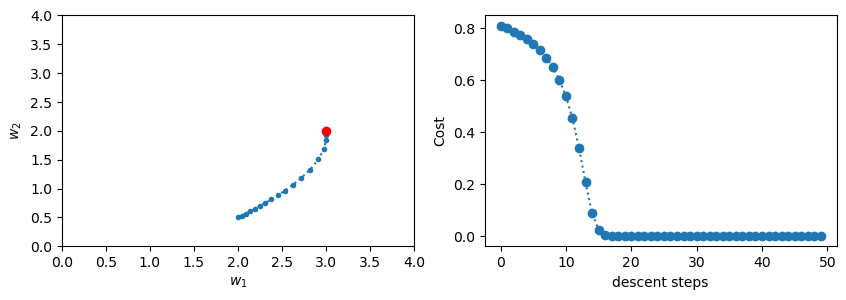

In [7]:
plt.figure(figsize=(10,3))

plt.subplot(121)
plt.plot(Ws[:,1], Ws[:,2], "o:", markersize=3)
plt.plot(3, 2, "ro")
plt.xlabel(L"$w_1$")
plt.ylabel(L"$w_2$")
plt.axis([0, 4, 0, 4])

plt.subplot(122)
plt.plot(costs,"o:")
plt.ylabel("Cost") 
plt.xlabel("descent steps");

### 7.1.2 Gradient Descent for Linear Regression $\newcommand{\t}[1]{\tilde{#1}}$ $\newcommand{\mbf}[1]{\mathbf{#1}}$

- Introduce some notations:

- For a data point $x$:  
input $\t{x}_1,\t{x}_2$ where $\t{x}_1=x$ and $\t{x}_2=1$  
prediction $p=w_1\t{x}_1+w_2\t{x}_2=\tilde{x}\cdot w$  and  
target $t$ is the desired output we want our prediction to match  
 **Note** use $\t{x}$ when the bias (last one is 1) is included in the input vector 

- For all $n_s$ samples:  
input matrix $\tilde{X}_{si}$ of dimension $(n_s,2)$  
predictions $P_s$ of dimension $(n_s,1)$     
with $w_i$ of dimension $(2,1)$ and   
targets $T_s$ of dimension $(n_s,1)$.

- The prediction can be written as matrix multiplication $\t{\mathbf{X}}\mathbf{w}=\mathbf{P}$

- Need $w_1,w_2$ minimising cost function $\text{Cost}=\frac{1}{2n_s}\sum_{s=1}^{n_s}(P_s-T_s)^2$

- To implement gradient descent we need $\frac{\p \text{Cost}}{\p w_1}$ and $\frac{\p \text{Cost}}{\p w_2}$.   

- **<font color='red'>Question</font>** Given 

   $$\text{Cost}=\frac{1}{2n_s}\sum_{s=1}^{n_s}(P_s-T_s)^2~~$$ and $$~~\sum_i\t{X}_{si}w_i=P_s,$$
  show that the $(2,1)$ dimensional gradient matrix is
   $$\frac{\p \text{Cost}}{\p \mbf{w}}=\frac{1}{n_s}\mbf{\t{X}}^T\mbf{\Delta},$$
  where $\Delta_s=P_s-T_s$ is the difference between prediction and target.  

- **<font color='green'>Answer</font>** 
    $$
    \begin{align*}
       \text{Cost} = & \frac{1}{2n_s}\sum_{s=1}^{n_s}(P_s-T_s)^2~~ \\
        = & \frac{1}{2n_s} (P-T)^T(P-T) \\ 
        = & \frac{1}{2n_s} (\t{X}w - T)^T(\t{X} - T) \\
        = & \frac{1}{2n_s} (w^T \t{X}^T \t{X} w- 2 w^T \t{X}^T T + T^TT)
    \end{align*}
    $$
    So 
    $$
    \begin{align*}
        \frac{\partial \text{Cost}}{\partial w} = & \frac{\partial }{\partial w}\frac{1}{2n_s} (w^T \t{X}^T \t{X} w- 2 w^T \t{X}^T T + T^TT) \\
        = & \frac{1}{2n_s} ( 2\t{X}^T\t{X} w - 2\t{X}^TT) \\
        = & \frac{1}{n_s} \t{X}^T (\t{X}w - T) \\
        = & \frac{1}{n_s} \t{X}^T (P - T) \\
        = & \frac{1}{n_s} \t{X}^T \Delta.
    \end{align*}
    $$
    
- Hence, the gradient-descent update rule for the weights is

  $$\mathbf{w}^{\mathrm{new}}=\mathbf{w}^{\mathrm{old}}-\alpha \frac{\p \text{Cost}}{\p \mathbf{w}}.$$

## 7.1.2 <font color='red'>Question:</font> Gradient Descent for Linear Regression

* For the curve $y=2x+1$ generate   
$n_s=10$ data points between $x=0\to1$   
with Gaussian noise added of standard deviation $\sigma=0.2$. 


* Use this to create $\t{X}_{si}$, where the second column are 1s  
as well as the target output vector $T_s$.


* Write three functions that take $\t{\mbf{X}}$, $\mbf{w}$, $\mbf{T}$ (as required) and return:  
the prediction $\mbf{P}$  
the weight gradients $\frac{\p C}{\p \mbf{w}}$  
the cost $C$.  


* Update the weights $\nu$ times (try range 5-100) from starting values, and plot the final result.  
Calculate the cost function at each update and plot that too.

* **NOTE** the equations needed are:

$\hspace{0.8cm} \mbf{\t{X}}\mbf{w}=\mbf{P},~~~\frac{\p C}{\p \mbf{w}}=\frac{1}{n_s}\mbf{\t{X}}^T\mbf{\Delta}~~$ where $~~\mbf{\Delta}=\mbf{P}-\mbf{T},~~$ and $~~C=\frac{1}{2n_s}\sum_{s=1}^{n_s}(P_s-T_s)^2$

### 7.1.2 <font color='green'>Answer:</font> Gradient Descent for Linear Regression

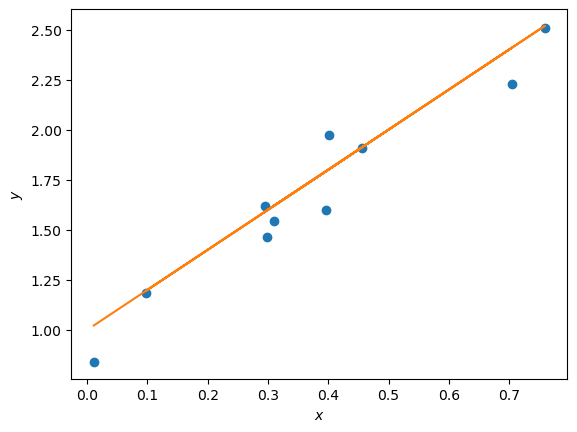

In [13]:
# Generate the data
sample_train_size = 10
k = 2
b = 1
σ = 0.2
X = rand(sample_train_size)
noises = randn(sample_train_size) .* σ
Y = k .* X .+ b + noises

plt.plot(X, Y, "o")
plt.plot(X, Y-noises, "-")
plt.xlabel(L"$x$")
plt.ylabel(L"$y$");

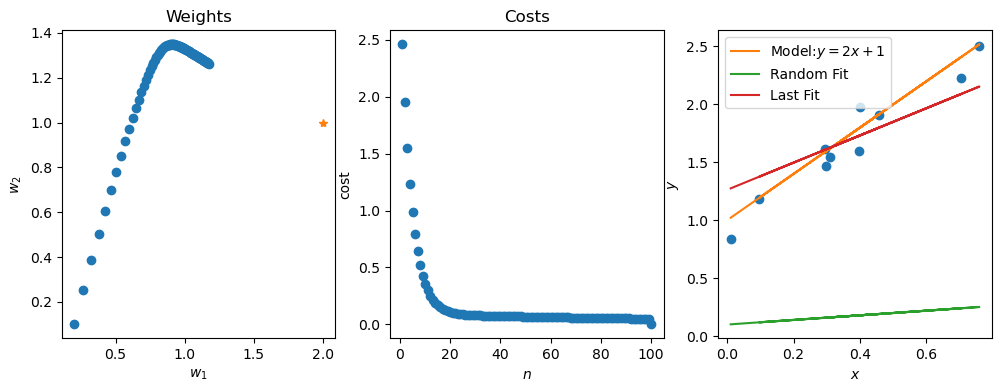

In [14]:
max_iter = 100
α = 0.1
Ws = Array{Float64, 2}(undef, max_iter, 2)
Ws[1, :] = [0.2, 0.1]
costs = Array{Float64, 1}(undef, size(Ws)[1])
Xs = [X ones(length(X))]

predict(X, W) = X * W

gradient(X, Y, Y⁺) = 1 / length(Y) * transpose(X) * (Y⁺ - Y)

cost(Y, Y⁺) = sum((Y-Y⁺).^2) / length(Y)
    
for i in 1: (max_iter-1)
    W = Ws[i, :]
    Y⁺ = predict(Xs, W)
    costs[i] = cost(Y, Y⁺)
    ∇W = gradient(Xs, Y, Y⁺)
    Ws[i+1, :] = W - α.* ∇W
end

w1s = Ws[:, 1]
w2s = Ws[:, 2]

figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(w1s, w2s, "o")
plt.plot(k, b, "*",label="true values")
plt.xlabel(L"$w_1$")
plt.ylabel(L"$w_2$")
plt.title("Weights")

plt.subplot(132)
plt.plot(1: max_iter, costs, "o")
plt.xlabel(L"$n$")
plt.ylabel("cost")
plt.title("Costs")

plt.subplot(133)
plt.plot(X, Y, "o")
plt.plot(X, Y-noises, label=L"Model:$y=2x+1$")
plt.plot(X, Xs*Ws[1,:], label="Random Fit")
plt.plot(X, Xs*Ws[end,:], label="Last Fit")
plt.xlabel(L"$x$")
plt.ylabel(L"$y$")
plt.legend();

### 7.1.3 Maximum Likelihood Cost

* In the previous question the cost function was

$\hspace{0.8cm}~~C=\frac{1}{2n_s}\sum_{s=1}^{n_s}(P_s-T_s)^2$


* Remember the likelihood ${\cal L}$: the probability (density)  
of seeing the data given the model parameters. 


* The difference between the predicted line and data is a Gaussian, so


$\hspace{0.8cm}{\cal L}=\frac{1}{(2\pi\sigma^2)^{n_s/2}}e^{-\sum(P_s-T_s)^2/2\sigma^2}$


* Maximising $\log({\cal L})$ and minimising the cost are equivalent: prediction most likely to have generated data 

## 7.2 Logistic Regression

7.2.1 Categorical data  
7.2.2 Logistic function and cost   
7.2.3 Gradient descent for logistic regression  
7.2.4 Classifier for linearly separable data 

### 7.2.1 Categorical Data

* Last week looked at linear and polynomial fits where target data were $\Re$.


* Categorical data is binary: member $t=1$ or not $t=0$ of a category. 


* Prediction $p$ can have value $0\to1$ and can be intepreted as probability that $t=1$ is seen.


* Can have multiple exclusive, or non-exclusive categories:    
stock decreases, stock the same, stock increases: results should add to one as exhaustive  
sunny tomrrow, windy tomorrow: no need for results to add to one



### 7.2.1 Categorical Data Example

* Let $X_s$ and $T_s$ be a set of samples.   
$x$ can be any real  
$t$ is either 0 or 1

In [15]:
logistic(z) = 1 ./ (1 .+ exp.(-z))
w1, w2 = 6.0, -6.0 # puts the f=1/2 value at x=1.

# create some data
sample_size = 10
X = 4 * rand(sample_size) .- 1 # some random x values between -1 and 3
Z = X * w1 .+ w2
T = rand(sample_size) .< logistic(Z) # use the logistic function as the "p" for Bernouilli randoms

# needed for the plot
xx = collect(-1:0.01:3) 
zz = xx * w1 .+ w2
ff = logistic(zz);

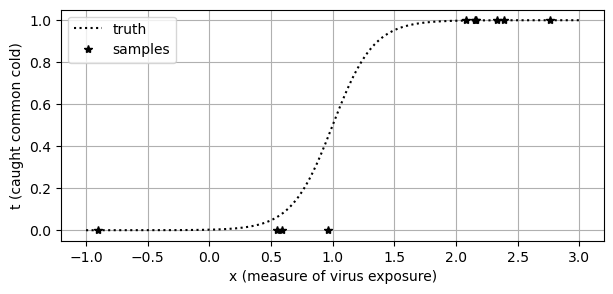

In [16]:
plt.figure(figsize=(7,3))
plt.plot(xx, ff, "k:", label="truth")
plt.plot(X, T, "k*", label="samples")
plt.xlabel("x (measure of virus exposure)")

plt.ylabel("t (caught common cold)")
plt.legend()
plt.grid();

### 7.2.2 Logistic Function

* Logistic function (sigmoid) is convenient for modelling this kind of data.

$\hspace{0.8cm} f(z)=1/(1+e^{-z})$.

* Where $z=\t{x}\cdot w$. In the previous example $\t{x}_1=x$ and $\t{x}_2=1$. So that

$\hspace{0.8cm} p(x)=f(z)~~$ where $~~f(z)=1/(1+e^{-(xw_1+w_2)})$.


* **<font color='red'>Question</font>**  
For what value of $x$ are the odds $p$ 50:50 ?  
What is the derivative of $f(z)$ expressed as a function of $f(z)$?

* **<font color='green'>Answer</font>**  
For what value of $x$ are the odds $p$ 50:50 ? $x=-w_2/w_1$     
What is the derivative of $f(z)$ expressed as a function of $f(z)$? $~\frac{df}{dz}=f(1-f)$

* Logistic function:

$\hspace{0.8cm} f(z)=1/(1+e^{-z})~~$ with useful property $~~\frac{df}{dz}=f(1-f)$

* Where $z=\t{x}\cdot w$. In the previous example $\t{x}_1=x$ and $\t{x}_2=1$. So that

$\hspace{0.8cm} p(x)=f(z)~~$ where $~~f(z)=1/(1+e^{-(xw_1+w_2)})$.


---

* Aim of logistic regression is to find weight parameters for best fit.  
    **What** is the cost function?


* Likelihood to see $t=1$ is $p$ and for $t=0$ it's $(1-p)$. For all samples:   


$\hspace{0.8cm} {\cal L}=\prod_{s=1}^{n_s}P_s^{T_s}(1-P_s)^{1-T_s}$  


* We use $-\log{\cal L}$ as the cost function to minimise

$\hspace{0.8cm} C=-\frac{1}{n_s}\sum_{s=1}^{n_s}\left(T_s\log(P_s)+(1-T_s)\log(1-P_s)\right)$


### 7.2.3 Gradient Descent for Logistic Regression$\newcommand{\t}[1]{\tilde{#1}}$

* The relevant equations for deriving weight gradients:

$\hspace{0.8cm}$ $P_s=f(z)~~$ where $~~f(z)=1/(1+e^{-z})~~$ and $z=\sum_i\t{X}_{si}w_i$  
* With cost $C=-\frac{1}{n_s}\sum_{s=1}^{n_s}\left(T_s\log(P_s)+(1-T_s)\log(1-P_s)\right)$.


* **<font color='red'>Question:</font>**

* Consider a single target $t$ and prediction $p$.   
cost is $c=-\left(t\log(p)+(1-t)\log(1-p)\right)$


* What are  

$$\frac{dc}{dp},~~ \frac{dp}{dz} ~~~\mbox{and} ~~~ \frac{dz}{dw_i}~~?$$ 


* Using these results show that 

$$\frac{\p c}{\p w_i}=\t{x_i}(p-t)~~~\mbox{and so in matrix form}~~~\frac{\p C}{\p \mathbf{w}}=\frac{1}{n_s}\mbf{\t{X}}^T(\mbf{P}-\mbf{T}).$$


* **<font color='green'>Answer:</font>**

* Using the cost is $c=-\left(t\log(p)+(1-t)\log(1-p)\right)$  

$$\frac{dc}{dp}=\frac{p-t}{p(1-p)},~~ \frac{dp}{dz}=p(1-p),~~ \frac{dz}{dw_i}=\t{x_i}$$


* Giving $$\frac{\p c}{\p w_i}=\t{x_i}(p-t)~~~\mbox{and so in matrix form}~~~\frac{\p C}{\p \mathbf{w}}=\frac{1}{n_s}\mbf{\t{X}}^T(\mbf{P}-\mbf{T})$$


* **NOTE** This looks the same as linear regression.

### 7.2.3 One Dimensional Example

* Return to the example shown earlier.

In [27]:
lfun(z)=1 ./(1 .+exp.(-z))
w1,w2=6.0,-6.0;

# create some data
ns=10
Random.seed!(11);
X=4*rand(ns) .-1 # some random x values between -1 and 3
Xb=[X ones(ns)]; # data with the bias included
Z=X*w1 .+w2
T=rand(ns).<lfun(Z) # use the logistic function as the "p" for Bernouilli randoms

# needed for the plot
xx=collect(-1:0.01:3)
zz=xx*w1 .+w2;
ff=lfun(zz);

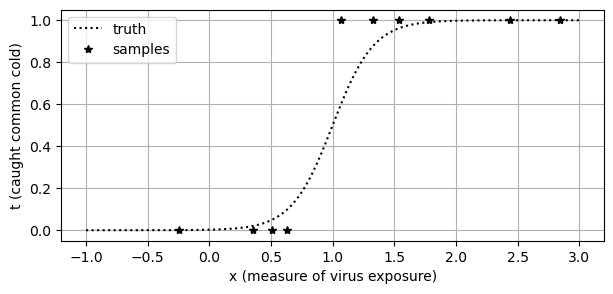

In [28]:
figure(figsize=(7,3))
plot(xx,ff,"k:",label="truth"); plot(X,T,"k*",label="samples")
xlabel("x (measure of virus exposure)"); legend() 
ylabel("t (caught common cold)"); grid();

* Goal is to use gradient descent to find w1 and w2


* Program has the same structure as for linear regression. 


* Need functions for calculating predictions, weight gradients and cost.


In [29]:
# functions that calculate weight update

function MyPrediction(Xb,w)
    Z=Xb*w
    P=lfun(Z) # altered from linear regression
    return P
end

function MyWeightUpdate(Xb,w,T)
    ns=length(T)
    P=MyPrediction(Xb,w)
    dCdw=(1/ns)*(Xb')*(P .-T)
    return dCdw
end;

function MyCost(Xb,w,T)
    ns=length(T)
    P=MyPrediction(Xb,w)
    # cost is altered from linear regression
    C=(-1/ns)*sum(T.*log.(P) .+(1 .-T).*log.(1 .-P))
    return C
end;

In [30]:
nu=1000
a=2.0
wL=zeros(2,nu)
CL=zeros(1,nu)
wL[:,1]=[1.0,-2]
CL[1,1]=MyCost(Xb,wL[:,1],T)

for k=2:nu
    w=wL[:,k-1]
    dCdw=MyWeightUpdate(Xb,w,T)
    wL[:,k]=w-a*dCdw
    CL[1,k]=MyCost(Xb,wL[:,k],T)
end

pp0fit=lfun(xx*wL[1,1] .+wL[2,1]); # logistic fit at the start
ppfit=lfun(xx*wL[1,end] .+wL[2,end]); # fit at end of descent

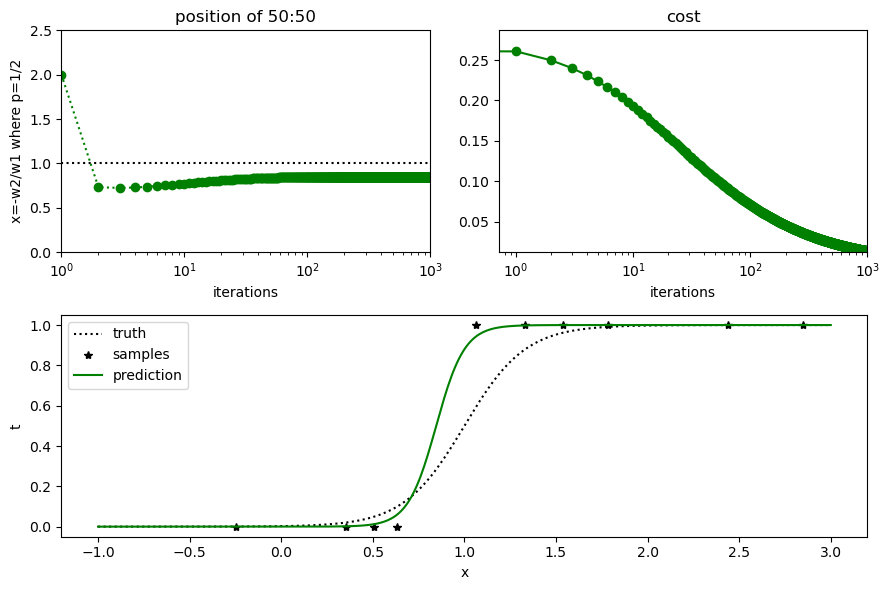

sys:1: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


In [32]:
figure(figsize=(9,6))

its=collect(1:nu)

subplot(221); title("position of 50:50")
semilogx(its,-wL[2,:]./wL[1,:],"o:g")
plot(its,-ones(nu)*w2/w1,":k")
ylabel("x=-w2/w1 where p=1/2"); xlabel("iterations")
axis([1,nu,0,2.5])

subplot(222)
semilogx(CL'[:],"o-g"); title("cost"); xlabel("iterations")
axis([0,nu,minimum(CL)*0.9,1.1*maximum(CL[2:end])])

subplot(212)
plot(xx,ff,"k:",label="truth"); 
plot(X,T,"k*",label="samples")
plot(xx,ppfit,"-g",label="prediction");
xlabel("x"); ylabel("t"); legend()

tight_layout();

## 7.2.4 Classifier for linearly separable data

* Each data point comprises two numbers, each random between $-1$ and $1$.  
Interpret these as an $(x_1, x_2)$ coordinate on a plane.  


* If $x_2>mx_1+c$ assign target $t=1$, if not it has target $t=0$.


* For $n_s$ samples the data can be summarised by two matricies.   
The input $\mathbf{X}$ has dimensions $(n_s,2)$   
The target $\mathbf{T}$ has dimensions $(n_s,1)$.


* Generate these matricies and plot on the $(x_1,x_2)$ plane  
points that have $t=1$ in green and those for $t=0$ in red


* Draw the dividing line given by $x_2=mx_1+c$.


* Suggested parameters are $n_s=50$, $m=1$ and $c=0.1$


In [22]:
ns=50
m,c=1.0,0.1

# create the data
Random.seed!(7);
X=2*(rand(ns,2) .-0.5) # generate the data
T=1.0*(X[:,2].>(m*X[:,1] .+c)) # assign the class

# add some scatter (optional)
sig=0.00
X=X .+sig*randn(ns,2)

Xb=[X ones(ns)];

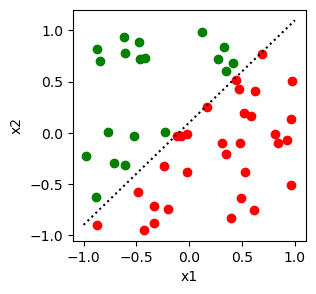

In [23]:
figure(figsize=(3,3))

# draw the separating line
x=collect(-1:0.1:1)
y=m*x .+c;

# visualise data with class labels as colours
for k=1:ns
    plot(X[k,1],X[k,2],(T[k]==1 ? "go" : "ro"))
end

plot(x,y,"k:")
xlabel("x1"); ylabel("x2");

## 7.2.4 <font color='red'>Question. </font> Classifier for linearly separable data


* If we include the bias as $\t{x_3}=1$ the equation $\t{x}\cdot w=0$ defines a line.
where $w_1$, $w_2$ and $w_3$ are weights.


* The logistic function $f(z)$ where $z=\t{x}\cdot w$ is therefore a function on the plane  
with the value 1/2 along the line $\t{x}\cdot w=0$ and tending to $0$ or $1$ on either side.   


* Write a gradient descent program that finds the weights $w_1$, $w_2$ and $w_3$   
that maximise the log likelihood of the prediction $\mbf{P}=f(\mbf{\t{X}}\mbf{w})$.


* **NOTE** The program is almost identical to the previous ones.

In [24]:
# functions that calculate weight update

function MyPrediction(Xb,w)
    Z=Xb*w
    P=logistic(Z) # altered from linear regression
    return P
end

function MyWeightUpdate(Xb,w,T)
    ns=length(T)
    P=MyPrediction(Xb,w)
    dCdw=(1/ns)*(Xb')*(P-T)
    return dCdw
end;

function MyCost(Xb,w,T)
    ns=length(T)
    P=MyPrediction(Xb,w)
    # cost is altered from linear regression
    C=(-1/ns)*sum(T.*log.(P) .+(1 .-T).*log.(1 .-P))
    return C
end;

In [25]:
nu=1000
a=2.0
wL=zeros(3,nu) #now three weight variables
CL=zeros(1,nu)
wL[:,1]=[0.0,1.0,-0.0] # initial weight values for gradient descent
CL[1,1]=MyCost(Xb,wL[:,1],T)

for k=2:nu
    w=wL[:,k-1]
    dCdw=MyWeightUpdate(Xb,w,T)
    wL[:,k]=w .-a*dCdw # new weights
    CL[1,k]=MyCost(Xb,wL[:,k],T)
end


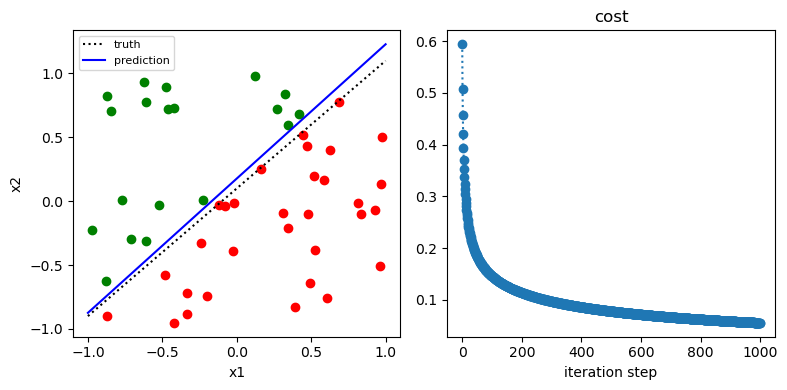

In [26]:
figure(figsize=(8,4))

# extract the separation line at the end of the descent
mfit=-wL[1,end]/wL[2,end]
cfit=-wL[3,end]/wL[2,end]
yfit=mfit*x .+cfit;

subplot(121)
for k=1:ns
    plot(X[k,1],X[k,2],(T[k]==1 ? "go" : "ro"))
end
plot(x,y,"k:",label="truth")
plot(x,yfit,"b-",label="prediction")
xlabel("x1"); ylabel("x2"); legend(fontsize=8)

subplot(122); title("cost");
plot(CL'[:],"o:"); 
xlabel("iteration step");
tight_layout()

# 7.3 Summary and additional question

## Day 7 Machine learning for data analysis I  

7.1 Gradient descent      
7.2 Logistic regression  
7.3 Summary and additional question    

---

## Question

Make sure you have understood and done all the questions in the lectures.

**Q7.3.1**   Width of the logistic fit


## <font color='red'>Q7.3.1</font> Width of the logistic fit

* In the final section we used a logistic function $f(z)$ to classify data on a plane  
where $z=x_1w_1+x_2w_2+w_3$.


* The line $z=0$ corresponding to $f(0)=0.5$ was used to draw the separating line.   
However, the range of the curve is not apparent.


*  Derive formulae for the 10$\%$ and 90$\%$ lines and plot on the same graph.


## <font color='green'>A7.3.1</font> Width of the logistic fit

* For a logistic function $f(z^*)=p^*$. This can be re-arranged to give 

$\hspace{0.8cm} z^*=\log\left(\frac{p^*}{1-p^*}\right)$


* For $p^*=0.1$ and $0.9$ we have $z^*=-2.2$ and $z^*=2.2$

* Hence we have $x_1w_1+x_2w_2+w_3=\pm2.2$ so that 

$\hspace{0.8cm} x_2=-\frac{w_1}{w_2}x_1-\frac{w_3}{w_2}\pm\frac{2.2}{w_2}$

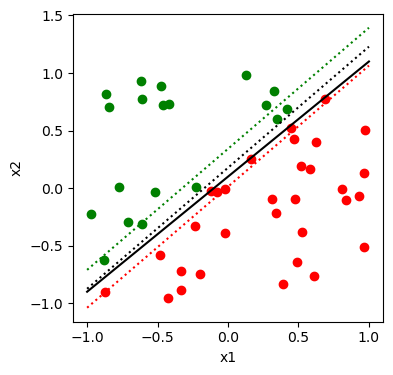

In [22]:
# Note: works if variables from previous data abd plots from 7.2.4 are still current

figure(figsize=(4,4))

m10=-wL[1,end]/wL[2,end]
c10=-(wL[3,end]+2.2)/wL[2,end]
y10=m10*x .+c10;

m90=-wL[1,end]/wL[2,end]
c90=-(wL[3,end]-2.2)/wL[2,end]
y90=m90*x .+c90;

for k=1:ns
    plot(X[k,1],X[k,2],(T[k]==1 ? "go" : "ro"))
end
plot(x,yfit,"k:",x,y,"k-")
plot(x,y10,"r:",x,y90,"g:")
xlabel("x1"); ylabel("x2");